In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

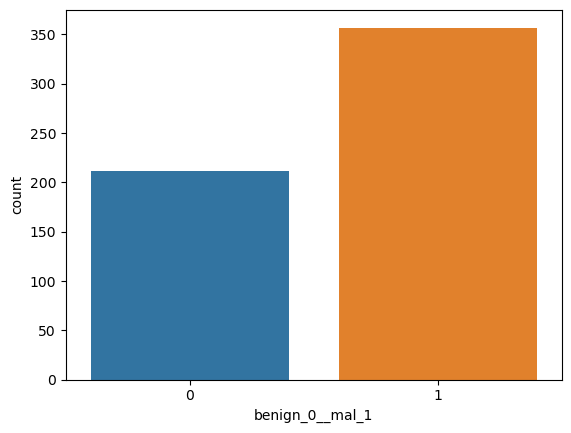

In [6]:
sns.countplot(data=df, x='benign_0__mal_1')

<AxesSubplot: >

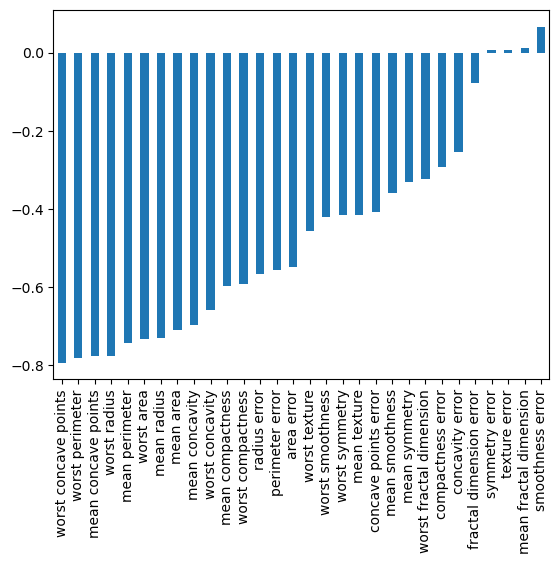

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

Metal device set to: Apple M2


2023-01-31 22:10:22.079100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 22:10:22.080209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600


2023-01-31 22:11:54.090109: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 22:11:54.449770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 0.6642

2023-01-31 22:11:56.100681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 2s 67ms/step - loss: 0.6642 - val_loss: 0.6443
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6256 - val_loss: 0.6004
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5732 - val_loss: 0.5450
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5243 - val_loss: 0.4986
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4776 - val_loss: 0.4500
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4307 - val_loss: 0.3972
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3810 - val_loss: 0.3458
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3379 - val_loss: 0.3052
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3011 - val_loss: 0.2706
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2741 - val_loss: 0.2465
Epoch 11/600
14/14 [

14/14 [==============================] - 0s 8ms/step - loss: 0.0529 - val_loss: 0.1146
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0516 - val_loss: 0.1102
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0516 - val_loss: 0.1114
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0505 - val_loss: 0.1119
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0516 - val_loss: 0.1151
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0511 - val_loss: 0.1168
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0500 - val_loss: 0.1107
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0498 - val_loss: 0.1140
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0535 - val_loss: 0.1098
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0531 - val_loss: 0.1079
Epoch 93/600


14/14 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.1260
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0382 - val_loss: 0.1385
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0419 - val_loss: 0.1224
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0401 - val_loss: 0.1332
Epoch 168/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0391 - val_loss: 0.1282
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.1325
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.1295
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0434 - val_loss: 0.1397
Epoch 172/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0394 - val_loss: 0.1293
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.1365
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0304 - val_loss: 0.1381
Epoch 246/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0294 - val_loss: 0.1251
Epoch 247/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0298 - val_loss: 0.1372
Epoch 248/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0302 - val_loss: 0.1182
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0461 - val_loss: 0.1709
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.1165
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0317 - val_loss: 0.1291
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0312 - val_loss: 0.1407
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0305 - val_loss: 0.1348
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0297 - val_loss: 0.1381
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.1365
Epoch 327/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0244 - val_loss: 0.1275
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0272 - val_loss: 0.1126
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.1283
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0215 - val_loss: 0.1425
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.1251
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0240 - val_loss: 0.1214
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0249 - val_loss: 0.1633
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0233 - val_loss: 0.1271
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.1303
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.1347
Epoch 408/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0151 - val_loss: 0.1403
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0155 - val_loss: 0.1348
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0155 - val_loss: 0.1419
Epoch 411/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0140 - val_loss: 0.1360
Epoch 412/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.1416
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0142 - val_loss: 0.1457
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0163 - val_loss: 0.1260
Epoch 415/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.1643
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.1212
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0127 - val_loss: 0.1840
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.1637
Epoch 490/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.1499
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.1702
Epoch 492/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0112 - val_loss: 0.1459
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.1675
Epoch 494/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.1707
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0096 - val_loss: 0.1516
Epoch 496/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.1508
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.1705
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.1884
Epoch 570/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.1737
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.1845
Epoch 572/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.1884
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.1987
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.1783
Epoch 575/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0069 - val_loss: 0.2132
Epoch 576/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.1845
Epoch 577/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.2155
Epoch 578/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0058 - val_loss: 0.1769
Epoc

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

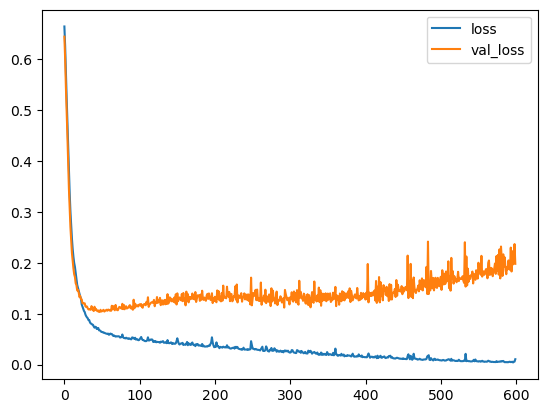

In [24]:
losses.plot()

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor="val_loss",mode='min',verbose=1,patience=25)

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
 1/14 [=>............................] - ETA: 9s - loss: 0.7187

2023-01-31 22:22:06.721122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 23ms/step - loss: 0.6847 - val_loss: 0.6635
Epoch 2/600
11/14 [======================>.......] - ETA: 0s - loss: 0.6471

2023-01-31 22:22:07.077960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 8ms/step - loss: 0.6426 - val_loss: 0.6293
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6073 - val_loss: 0.5918
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5687 - val_loss: 0.5503
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5281 - val_loss: 0.5060
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4859 - val_loss: 0.4612
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4437 - val_loss: 0.4168
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4038 - val_loss: 0.3766
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3690 - val_loss: 0.3402
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3394 - val_loss: 0.3086
Epoch 11/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3096 - val_loss: 0.2797
Epoch 12/600
14/14 [

14/14 [==============================] - 0s 8ms/step - loss: 0.0558 - val_loss: 0.0985
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0535 - val_loss: 0.1026
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0541 - val_loss: 0.1054
Epoch 86: early stopping


In [29]:
loss_early_stop = pd.DataFrame(model.history.history)

<AxesSubplot: >

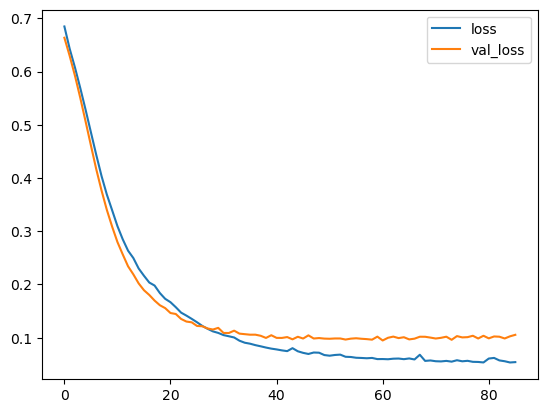

In [30]:
loss_early_stop.plot()

In [31]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600


2023-01-31 22:27:07.770610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 26ms/step - loss: 0.7142 - val_loss: 0.6814
Epoch 2/600
 9/14 [==================>...........] - ETA: 0s - loss: 0.6872

2023-01-31 22:27:08.336570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 9ms/step - loss: 0.6872 - val_loss: 0.6618
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6601 - val_loss: 0.6446
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6437 - val_loss: 0.6260
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6116 - val_loss: 0.6015
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5980 - val_loss: 0.5775
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5953 - val_loss: 0.5555
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5573 - val_loss: 0.5327
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5422 - val_loss: 0.5083
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5350 - val_loss: 0.4827
Epoch 11/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4982 - val_loss: 0.4556
Epoch 12/600
14/14 [

14/14 [==============================] - 0s 8ms/step - loss: 0.1085 - val_loss: 0.1021
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1148 - val_loss: 0.1014
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1215 - val_loss: 0.0976
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1104 - val_loss: 0.0967
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1014 - val_loss: 0.0973
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1049 - val_loss: 0.0960
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0888 - val_loss: 0.0964
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1104 - val_loss: 0.0965
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1042 - val_loss: 0.0961
Epoch 93/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0960 - val_loss: 0.0964
Epoch 94/600


In [33]:
loss_drop = pd.DataFrame(model.history.history)

<AxesSubplot: >

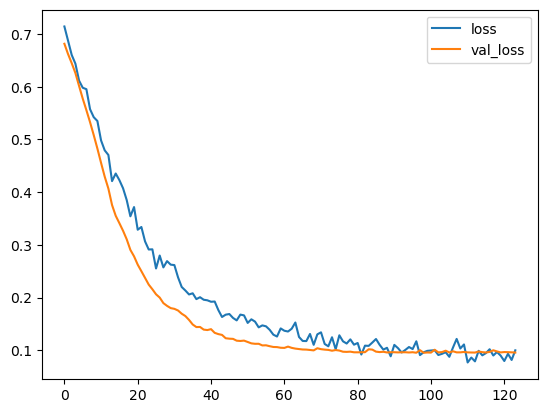

In [34]:
loss_drop.plot()

In [41]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [44]:
print(confusion_matrix(y_test,predictions))

[[52  3]
 [ 0 88]]
